### C3W4
Домашка номер один

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn import ensemble, metrics, model_selection, tree, datasets

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
digits_df = datasets.load_digits()
X = digits_df.data
y = digits_df.target

### Определим функцию которая на вход принимает классификатор, данные и значение для k-fold кросс-валидации

In [4]:
def experiment(classifier, X, y, k):
    """classifier - tree or ensemble
    X - data 
    y - targets
    k - value for cross validation"""
    result = model_selection.cross_val_score(classifier, X , y, cv=k)
    return result.mean()

In [5]:
deccision_tree = tree.DecisionTreeClassifier()
experiment(deccision_tree, X, y, 10)

0.825788330229671

In [6]:

d=0
answers = np.zeros([1,10])
while d < 10:
    answers[:,d]=experiment(deccision_tree, X, y, 10)
    d+=1
print(answers.mean())

0.824465859714463


In [7]:
def write_answer_1(answer):
    with open("C3W4_answer1.txt", "w") as fout:
        fout.write(str(answer))
write_answer_1(answers.mean())

### Bagging classifier 

In [9]:
%%time
classifier = ensemble.BaggingClassifier(n_estimators=100, n_jobs=-1)
experiment(classifier, X, y, k=10)

CPU times: user 736 ms, sys: 159 ms, total: 895 ms
Wall time: 9.56 s


0.924292364990689

In [10]:
%%time
classifier = ensemble.BaggingClassifier(n_estimators=100, n_jobs=1)
experiment(classifier, X, y, k=10)

CPU times: user 13 s, sys: 82.1 ms, total: 13.1 s
Wall time: 13.2 s


0.9231781502172562

In [84]:
%%time
bag = ensemble.BaggingClassifier(n_estimators=100, n_jobs=-1)
d=0
answers = np.zeros([1,10])
while d < 10:
    answers[:,d]=experiment(bag, X, y, 10)
    d+=1
print(answers.mean())

def write_answer_2(answer):
    with open("C3W4_answer2.txt", "w") as fout:
        fout.write(str(answer))
write_answer_2(answers.mean())

0.9246691495965239
CPU times: user 7.16 s, sys: 1.03 s, total: 8.2 s
Wall time: 1min 13s


### Bagging based on $\sqrt{d}$ features of data

In [18]:
ensemble.BaggingClassifier(max_features=1/8)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.125, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

> ### Bagging classifier has parameter `max_features`, which allows to select part of all fetures in dataset

In [19]:
%%time
classifier = ensemble.BaggingClassifier(n_estimators=100, max_features=1/8, n_jobs=-1)
d=0
answers = np.zeros([1,10])
while d < 10:
    answers[:,d]=experiment(classifier, X, y, 10)
    d+=1
print(answers.mean())

def write_answer_3(answer):
    with open("C3W4_answer3.txt", "w") as fout:
        fout.write(str(answer))
write_answer_3(answers.mean())

0.9311613904407199
CPU times: user 9.77 s, sys: 5.33 s, total: 15.1 s
Wall time: 37.4 s


## Bagging with random $\sqrt{d}$ features for each decission tree

In [21]:
classifier = tree.DecisionTreeClassifier(max_features='sqrt')

In [22]:
%%time
classifier = ensemble.BaggingClassifier(base_estimator=classifier, n_estimators=100, n_jobs=-1)
d=0
answers = np.zeros([1,10])
while d < 10:
    answers[:,d]=experiment(classifier, X, y, 10)
    d+=1
print(answers.mean())

def write_answer_4(answer):
    with open("C3W4_answer4.txt", "w") as fout:
        fout.write(str(answer))
write_answer_4(answers.mean())

0.9481831160769708
CPU times: user 8.07 s, sys: 1.83 s, total: 9.9 s
Wall time: 36.1 s


## Compare Bagging with random features selection for each Decission Tree and Ranfom Forest classifier

In [25]:
rf = ensemble.RandomForestClassifier()

In [30]:
%%time
classifier = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1)
d=0
answers = np.zeros([1,10])
while d < 10:
    answers[:,d]=experiment(classifier, X, y, 10)
    d+=1
print(answers.mean())

[[0.94268156 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]
[[0.94268156 0.94935444 0.         0.         0.         0.
  0.         0.         0.         0.        ]]
[[0.94268156 0.94935444 0.94710739 0.         0.         0.
  0.         0.         0.         0.        ]]
[[0.94268156 0.94935444 0.94710739 0.95213222 0.         0.
  0.         0.         0.         0.        ]]
[[0.94268156 0.94935444 0.94710739 0.95213222 0.9499131  0.
  0.         0.         0.         0.        ]]
[[0.94268156 0.94935444 0.94710739 0.95213222 0.9499131  0.9510149
  0.         0.         0.         0.        ]]
[[0.94268156 0.94935444 0.94710739 0.95213222 0.9499131  0.9510149
  0.95157976 0.         0.         0.        ]]
[[0.94268156 0.94935444 0.94710739 0.95213222 0.9499131  0.9510149
  0.95157976 0.94657045 0.         0.        ]]
[[0.94268156 0.94935444 0.94710739 0.95213222 0.9499131  0.9510149
  0.95157976 0.94657045 0.94657045 0.        ]]


## Task 5. Parameters of Random Forest

In [87]:
!echo "2 3 4 7" > C2W4_answer_5.txt

> answers: 2 3 4 6

In [34]:
number_of_trees = np.arange(5,100,5)
answers = np.zeros([1,len(number_of_trees)])

Text(0.5, 0, 'number of fetures')

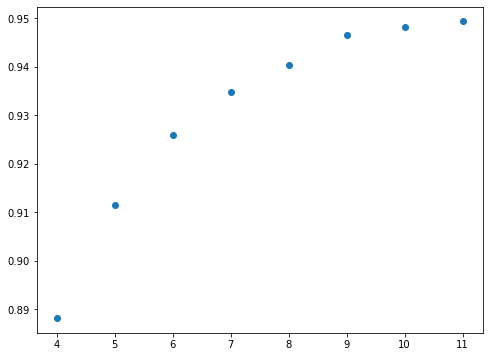

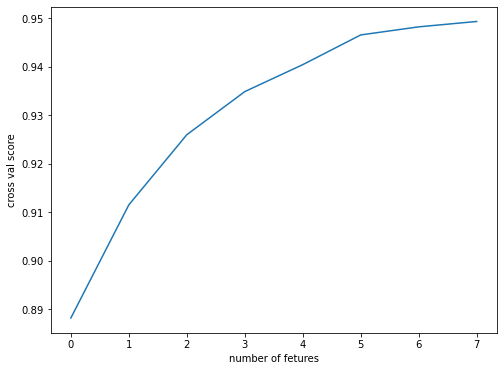

In [73]:
# depth of trees and accuracy
number_of_features = np.arange(4,12,1)
answers = np.zeros([1,len(number_of_features)])

for num, val in enumerate(number_of_features):
    clf = ensemble.RandomForestClassifier(max_depth=val)
    answers[:,num] = np.mean(model_selection.cross_val_score(clf, X, y, cv=10))
    
    
plt.figure(figsize=(8,6))
plt.scatter(number_of_features, y = answers)




plt.figure(figsize=(8,6))
plt.plot(answers[0])
plt.ylabel('cross val score')
plt.xlabel('number of fetures')

Text(0.5, 0, 'number of trees')

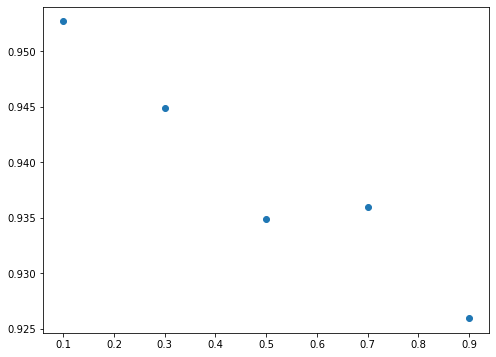

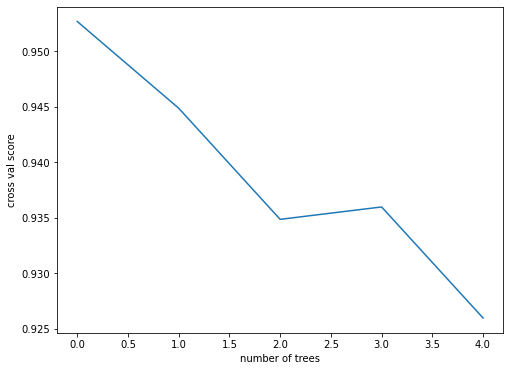

In [71]:
# Number of featured
number_of_features = np.arange(0.1,1.,0.2)
answers = np.zeros([1,len(number_of_features)])

for num, val in enumerate(number_of_features):
    clf = ensemble.RandomForestClassifier(max_features=val)
    answers[:,num] = np.mean(model_selection.cross_val_score(clf, X, y, cv=10))
    
    
plt.figure(figsize=(8,6))
plt.scatter(number_of_features, y = answers)




plt.figure(figsize=(8,6))
plt.plot(answers[0])
plt.ylabel('cross val score')
plt.xlabel('number of fetures')

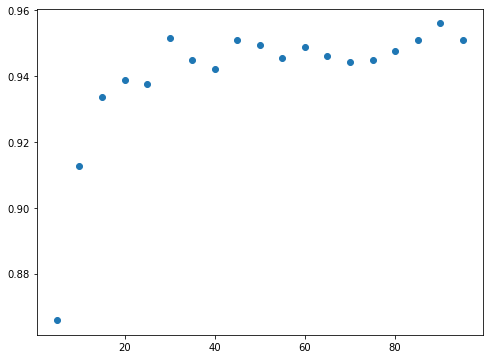

In [46]:
# Number of trees and accuracy
number_of_trees = np.arange(5,100,5)
answers = np.zeros([1,len(number_of_trees)])

for num, val in enumerate(number_of_trees):
    clf = ensemble.RandomForestClassifier(n_estimators=val)
    answers[:,num] = np.mean(model_selection.cross_val_score(clf, X, y, cv=10))
    
    
plt.figure(figsize=(8,6))
plt.scatter(number_of_trees, y = answers)

In [51]:
clf = ensemble.RandomForestClassifier(n_estimators=20)
train_sizes, train_scores, test_scores = model_selection.learning_curve\
                                            (clf, X, y, cv=3, scoring='accuracy')

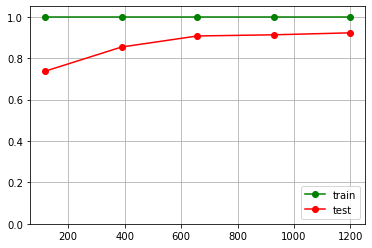

In [52]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')